In [1]:
import pandas as pd
import seaborn as sns

In [2]:
# Dataset URL

diamonds_url = 'https://raw.githubusercontent.com/TrainingByPackt/Interactive-Data-Visualization-with-Python/master/datasets/diamonds.csv'

diamonds_df = pd.read_csv(diamonds_url)

In [4]:
diamonds_df = sns.load_dataset('diamonds')

In [5]:
# We can use usecols if only some columns are needed

diamonds_df_specific_cols = pd.read_csv(diamonds_url, usecols=['carat', 'cut', 'color', 'clarity'])

In [6]:
diamonds_df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [7]:
diamonds_df.shape

(53940, 10)

In [8]:
diamonds_df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [12]:
diamonds_df.describe(include='category') # not 'object'

,cut,color,clarity
count,53940,53940,53940
unique,5,7,8
top,Ideal,G,SI1
freq,21551,11292,13065


In [11]:
diamonds_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB


In [13]:
# Selecting columns from a df

diamonds_low_df = diamonds_df.loc[diamonds_df['cut']=='Ideal']
diamonds_low_df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
11,0.23,Ideal,J,VS1,62.8,56.0,340,3.93,3.90,2.46
13,0.31,Ideal,J,SI2,62.2,54.0,344,4.35,4.37,2.71
16,0.30,Ideal,I,SI2,62.0,54.0,348,4.31,4.34,2.68
39,0.33,Ideal,I,SI2,61.8,55.0,403,4.49,4.51,2.78


In [14]:
# Adding new columns

diamonds_df['price_per_carat'] = diamonds_df['price']/diamonds_df['carat']
diamonds_df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,price_per_carat
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,1417.391304
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,1552.380952
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,1421.739130
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,1151.724138
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,1080.645161


In [15]:
# Conditional addition of columns

import numpy as np

In [16]:
diamonds_df['price_per_carat_is_high'] = np.where(diamonds_df['price_per_carat']>3500, 1, 0)
diamonds_df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,price_per_carat,price_per_carat_is_high
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,1417.391304,0
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,1552.380952,0
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,1421.739130,0
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,1151.724138,0
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,1080.645161,0


In [17]:
# Applying functions on df columns

diamonds_df['price'] = diamonds_df['price']*1.3

In [18]:
import math
diamonds_df['rounded_price'] = diamonds_df['price'].apply(math.ceil)
diamonds_df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,price_per_carat,price_per_carat_is_high,rounded_price
0,0.23,Ideal,E,SI2,61.5,55.0,423.8,3.95,3.98,2.43,1417.391304,0,424
1,0.21,Premium,E,SI1,59.8,61.0,423.8,3.89,3.84,2.31,1552.380952,0,424
2,0.23,Good,E,VS1,56.9,65.0,425.1,4.05,4.07,2.31,1421.739130,0,426
3,0.29,Premium,I,VS2,62.4,58.0,434.2,4.20,4.23,2.63,1151.724138,0,435
4,0.31,Good,J,SI2,63.3,58.0,435.5,4.34,4.35,2.75,1080.645161,0,436


In [19]:
# Using lambda to implement a simple one-line function

diamonds_df['rounded_price_to_100multiple'] = diamonds_df['price'].apply(lambda x: math.ceil(x/100)*100)
diamonds_df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,price_per_carat,price_per_carat_is_high,rounded_price,rounded_price_to_100multiple
0,0.23,Ideal,E,SI2,61.5,55.0,423.8,3.95,3.98,2.43,1417.391304,0,424,500
1,0.21,Premium,E,SI1,59.8,61.0,423.8,3.89,3.84,2.31,1552.380952,0,424,500
2,0.23,Good,E,VS1,56.9,65.0,425.1,4.05,4.07,2.31,1421.739130,0,426,500
3,0.29,Premium,I,VS2,62.4,58.0,434.2,4.20,4.23,2.63,1151.724138,0,435,500
4,0.31,Good,J,SI2,63.3,58.0,435.5,4.34,4.35,2.75,1080.645161,0,436,500


In [20]:
# Do this with a user-defined function

def get_100_multiple_ceil(x):
    y = math.ceil(x/100)*100
    return y

diamonds_df['rounded_price_to_100multiple'] = diamonds_df['price'].apply(get_100_multiple_ceil)
diamonds_df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,price_per_carat,price_per_carat_is_high,rounded_price,rounded_price_to_100multiple
0,0.23,Ideal,E,SI2,61.5,55.0,423.8,3.95,3.98,2.43,1417.391304,0,424,500
1,0.21,Premium,E,SI1,59.8,61.0,423.8,3.89,3.84,2.31,1552.380952,0,424,500
2,0.23,Good,E,VS1,56.9,65.0,425.1,4.05,4.07,2.31,1421.739130,0,426,500
3,0.29,Premium,I,VS2,62.4,58.0,434.2,4.20,4.23,2.63,1151.724138,0,435,500
4,0.31,Good,J,SI2,63.3,58.0,435.5,4.34,4.35,2.75,1080.645161,0,436,500


In [21]:
diamonds_df_exercise = sns.load_dataset('diamonds')

def is_desired(x):
    bool_var = 'yes' if (x['cut']=='Ideal' and x['color']=='D') else 'no'
    return bool_var

diamonds_df_exercise['desired'] = diamonds_df_exercise.apply(is_desired, axis=1)
diamonds_df_exercise.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,desired
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,no
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,no
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,no
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,no
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,no


In [22]:
# Deleting columns

diamonds_df = diamonds_df.drop(columns=['rounded_price', 'rounded_price_to_100multiple'])
diamonds_df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,price_per_carat,price_per_carat_is_high
0,0.23,Ideal,E,SI2,61.5,55.0,423.8,3.95,3.98,2.43,1417.391304,0
1,0.21,Premium,E,SI1,59.8,61.0,423.8,3.89,3.84,2.31,1552.380952,0
2,0.23,Good,E,VS1,56.9,65.0,425.1,4.05,4.07,2.31,1421.739130,0
3,0.29,Premium,I,VS2,62.4,58.0,434.2,4.20,4.23,2.63,1151.724138,0
4,0.31,Good,J,SI2,63.3,58.0,435.5,4.34,4.35,2.75,1080.645161,0


In [24]:
# writing to a file

diamonds_df = sns.load_dataset('diamonds')
diamonds_df.to_csv('diamonds_modified.csv')

In [25]:
print(diamonds_df.head())

   carat      cut color clarity  depth  table  price     x     y     z
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75


In [26]:
diamonds_df.to_csv('diamonds_modified.csv', index=False)

In [27]:
diamonds_df = sns.load_dataset('diamonds')

array([[<AxesSubplot:title={'center':'carat'}>]], dtype=object)

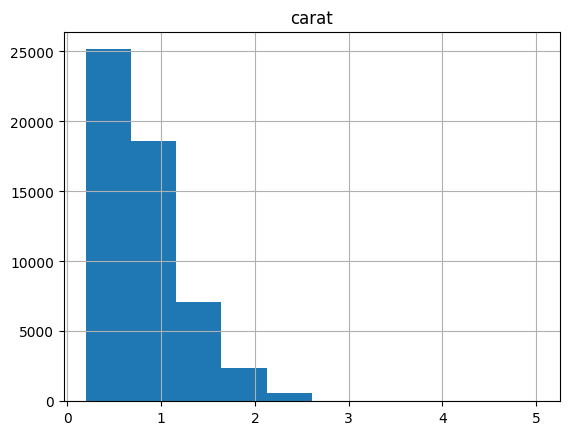

In [28]:
diamonds_df.hist(column='carat')

array([[<AxesSubplot:title={'center':'carat'}>]], dtype=object)

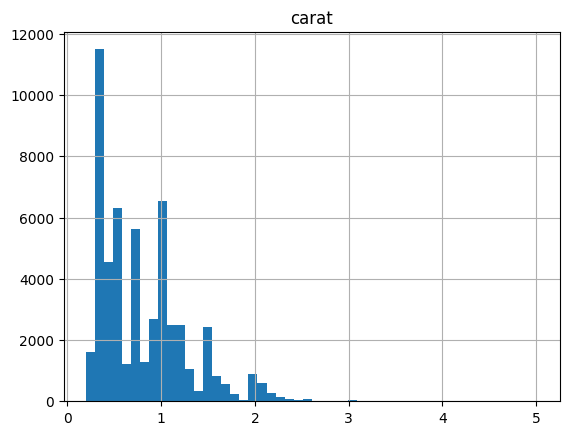

In [29]:
diamonds_df.hist(column='carat', bins=50)

C:\Users\G517844\pyscripts\vizbook\lib\site-packages\ipykernel_launcher.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  """Entry point for launching an IPython kernel.


<AxesSubplot:xlabel='carat', ylabel='Density'>

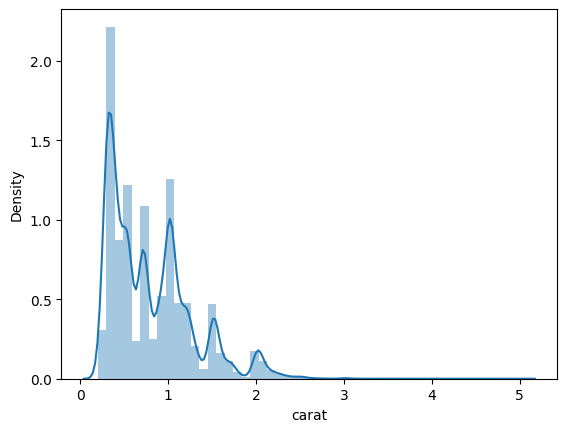

In [30]:
sns.distplot(diamonds_df.carat)

C:\Users\G517844\pyscripts\vizbook\lib\site-packages\ipykernel_launcher.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  """Entry point for launching an IPython kernel.


<AxesSubplot:xlabel='carat'>

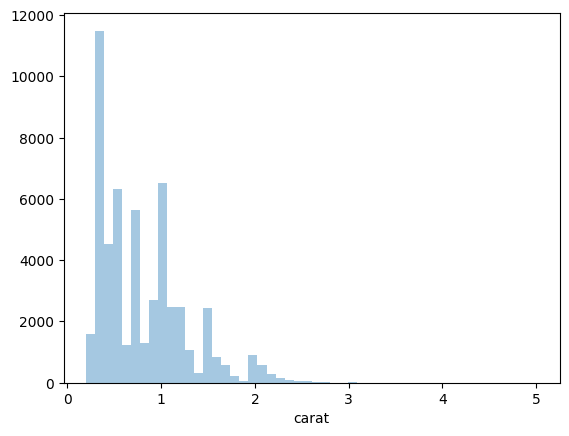

In [31]:
sns.distplot(diamonds_df.carat, kde=False)

C:\Users\G517844\pyscripts\vizbook\lib\site-packages\ipykernel_launcher.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  """Entry point for launching an IPython kernel.


<AxesSubplot:xlabel='carat'>

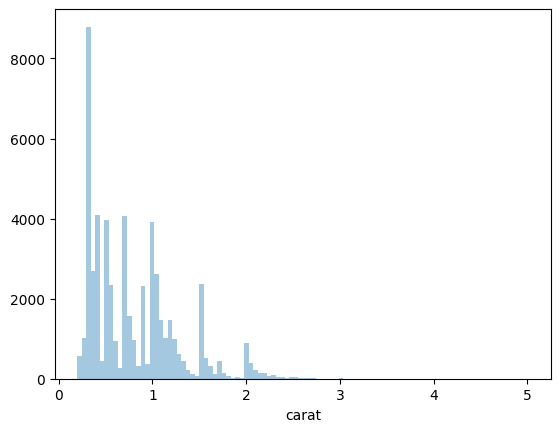

In [32]:
sns.distplot(diamonds_df.carat, kde=False, bins=100)

C:\Users\G517844\pyscripts\vizbook\lib\site-packages\ipykernel_launcher.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  """Entry point for launching an IPython kernel.


<AxesSubplot:xlabel='price'>

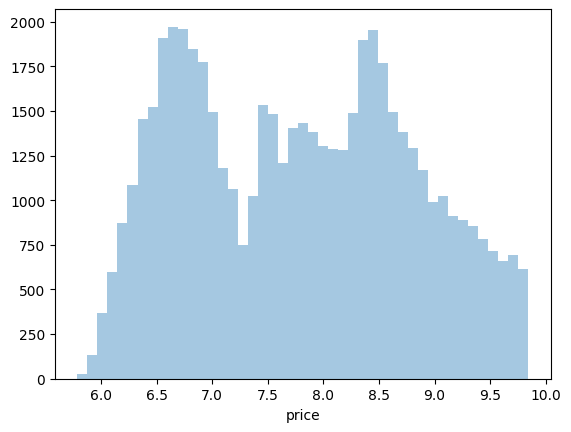

In [33]:
sns.distplot(np.log(diamonds_df.price), kde=False)

In [34]:
diamonds_df.cut.unique()

['Ideal', 'Premium', 'Good', 'Very Good', 'Fair']
Categories (5, object): ['Ideal', 'Premium', 'Very Good', 'Good', 'Fair']

In [35]:
diamonds_df.clarity.unique()

['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF']
Categories (8, object): ['IF', 'VVS1', 'VVS2', 'VS1', 'VS2', 'SI1', 'SI2', 'I1']

In [36]:
cut_count_table = pd.crosstab(index=diamonds_df['cut'], columns='count')
cut_count_table

col_0,count
cut,
Ideal,21551
Premium,13791
Very Good,12082
Good,4906
Fair,1610


<AxesSubplot:xlabel='cut'>

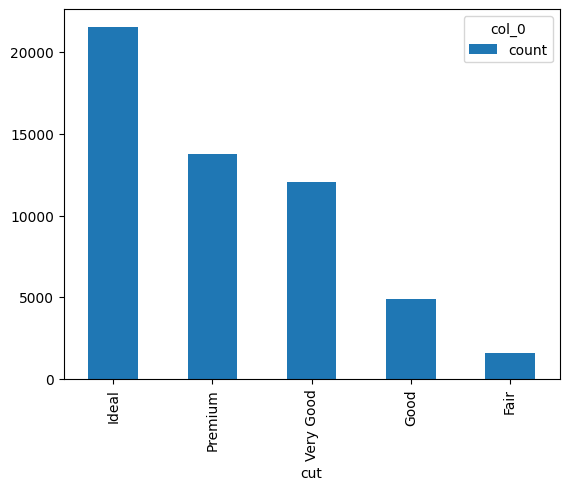

In [37]:
cut_count_table.plot(kind='bar')

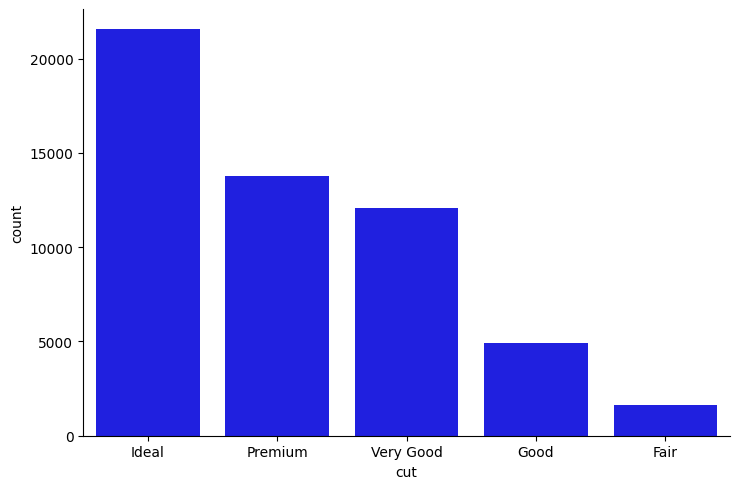

In [41]:
sns.catplot(x='cut', data=diamonds_df, aspect=1.5, kind='count', color='b')

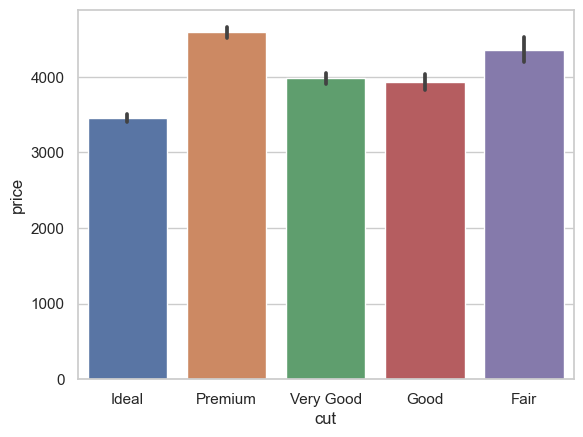

In [42]:
sns.set(style='whitegrid')
ax = sns.barplot(x='cut', y='price', data=diamonds_df, estimator=np.mean)

C:\Users\G517844\pyscripts\vizbook\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 68)` for the same effect.

  """Entry point for launching an IPython kernel.


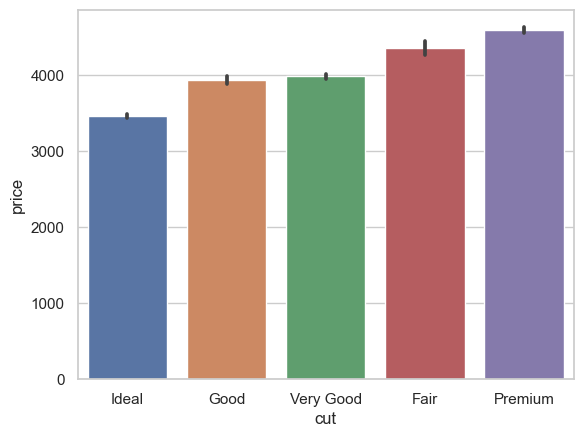

In [43]:
ax = sns.barplot(x='cut', y='price', data=diamonds_df, estimator=np.mean, ci=68, order=['Ideal', 'Good', 'Very Good', 'Fair', 'Premium'])

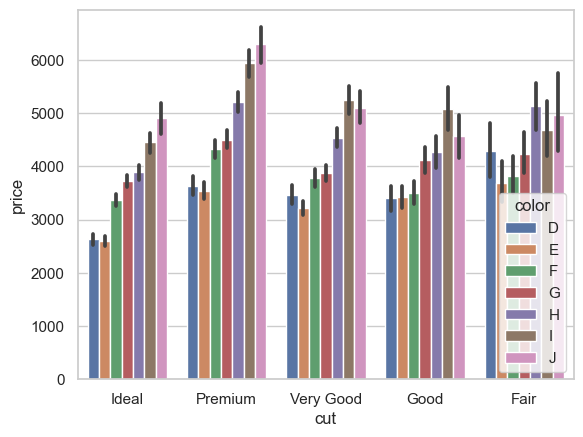

In [44]:
ax = sns.barplot(x='cut', y='price', hue='color', data=diamonds_df)

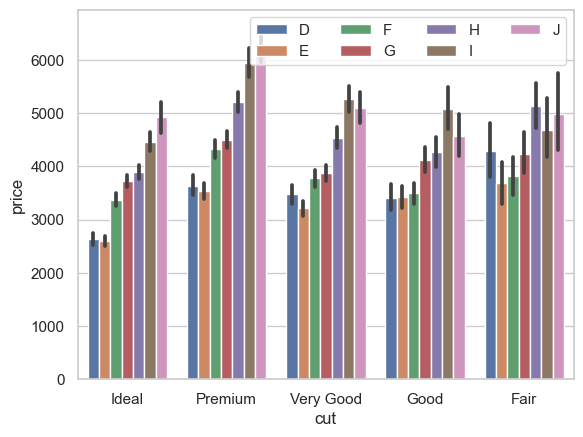

In [45]:
ax = sns.barplot(x='cut', y='price', hue='color', data=diamonds_df)
ax.legend(loc='upper right', ncol=4)

Text(0, 0.5, 'Price')

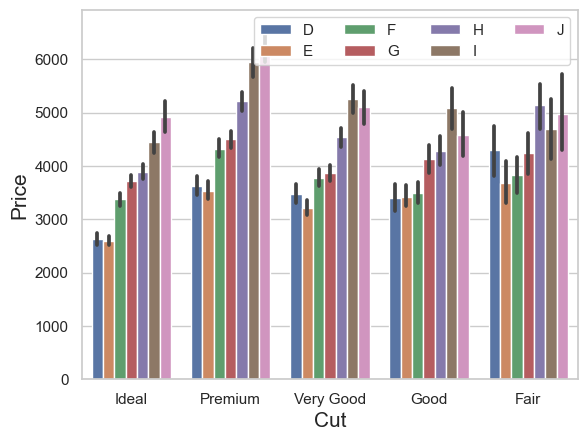

In [46]:
ax = sns.barplot(x='cut', y='price', hue='color', data=diamonds_df)
ax.legend(loc='upper right', ncol=4)
ax.set_xlabel('Cut', fontdict={'fontsize':15})
ax.set_ylabel('Price', fontdict={'fontsize':15})

[Text(0, 0, 'Ideal'),
 Text(1, 0, 'Premium'),
 Text(2, 0, 'Very Good'),
 Text(3, 0, 'Good'),
 Text(4, 0, 'Fair')]

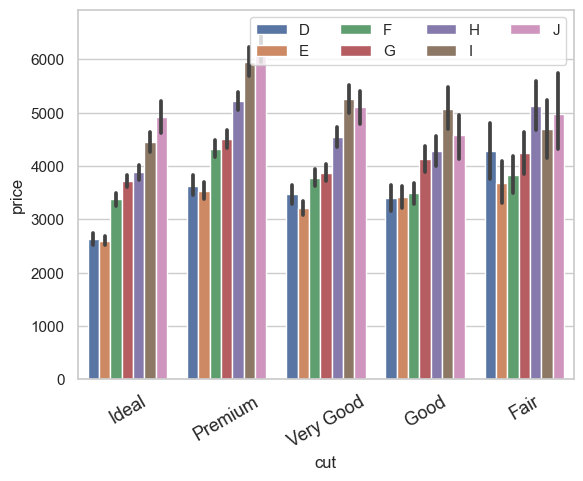

In [47]:
ax = sns.barplot(x='cut', y='price', hue='color', data=diamonds_df)
ax.legend(loc='upper right', ncol=4)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=13, rotation=30)

In [48]:
# Annotating plots

import matplotlib.pyplot as plt

0 21551


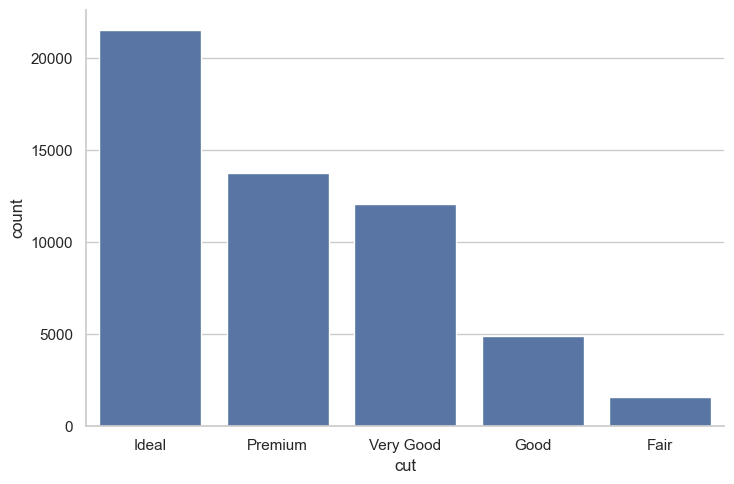

In [49]:
ax = sns.catplot(x='cut', data=diamonds_df, aspect=1.5, kind='count', color='b')

ideal_group = diamonds_df.loc[diamonds_df['cut']=='Ideal']
x = ideal_group.index.tolist()[0] # location of x coordinate for placing the annotation
y = len(ideal_group) # location of y coordinate for placing the annotation
print(x, y)

Text(0.3, 23551, 'excellent polish and symmetry ratings;\nreflects almost all the light that enters it')

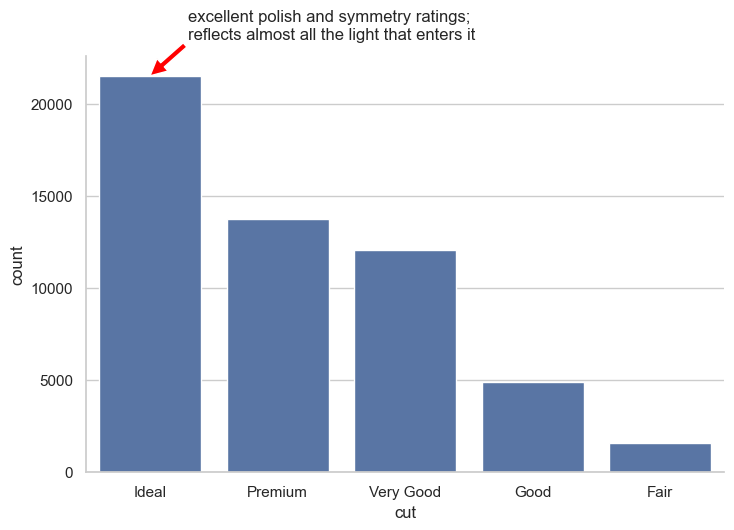

In [50]:
ax = sns.catplot(x='cut', data=diamonds_df, aspect=1.5, kind='count', color='b')
plt.annotate('excellent polish and symmetry ratings;\nreflects almost all the light that enters it', xy=(x,y), xytext=(x+0.3, y+2000), arrowprops=dict(facecolor='red'))

In [51]:
# Activity 1

olympics_url = "https://raw.githubusercontent.com/TrainingByPackt/Interactive-Data-Visualization-with-Python/refs/heads/master/datasets/athlete_events.csv"

olympics_df = pd.read_csv(olympics_url)
olympics_df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [52]:
olympics_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [68]:
olympics_medals_df = olympics_df.loc[olympics_df['Medal'].notnull()]
olympics_2016_df = olympics_medals_df.loc[olympics_medals_df['Year']==2016]
olympics_2016_df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
158,62,Giovanni Abagnale,M,21.0,198.0,90.0,Italy,ITA,2016 Summer,2016,Summer,Rio de Janeiro,Rowing,Rowing Men's Coxless Pairs,Bronze
161,65,Patimat Abakarova,F,21.0,165.0,49.0,Azerbaijan,AZE,2016 Summer,2016,Summer,Rio de Janeiro,Taekwondo,Taekwondo Women's Flyweight,Bronze
175,73,Luc Abalo,M,31.0,182.0,86.0,France,FRA,2016 Summer,2016,Summer,Rio de Janeiro,Handball,Handball Men's Handball,Silver
450,250,Saeid Morad Abdevali,M,26.0,170.0,80.0,Iran,IRI,2016 Summer,2016,Summer,Rio de Janeiro,Wrestling,"Wrestling Men's Middleweight, Greco-Roman",Bronze
794,455,Denis Mikhaylovich Ablyazin,M,24.0,161.0,62.0,Russia,RUS,2016 Summer,2016,Summer,Rio de Janeiro,Gymnastics,Gymnastics Men's Team All-Around,Silver


In [70]:
olympics_2016_df['Medal'].describe()

count       2023
unique         3
top       Bronze
freq         703
Name: Medal, dtype: object

In [71]:
medal_count_table = pd.crosstab(index=olympics_2016_df['Sport'], columns='count')
sorted_medal_count_table = medal_count_table.sort_values(by='count', ascending=False)
sorted_medal_count_table

col_0,count
Sport,
Athletics,192
Swimming,191
Rowing,144
Football,106
Hockey,99
Handball,89
Cycling,84
Canoeing,82
Water Polo,78


In [73]:
def is_top(x):
    bool_v = 1 if (x['Sport']=='Athletics' or x['Sport']=='Swimming' or x['Sport']=='Rowing' or x['Sport']=='Football' or x['Sport']=='Hockey') else 0
    return bool_v

olympics_2016_df['top_sport'] = olympics_2016_df.apply(is_top, axis=1)
olympics_2016_df.head()

C:\Users\G517844\pyscripts\vizbook\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,top_sport
158,62,Giovanni Abagnale,M,21.0,198.0,90.0,Italy,ITA,2016 Summer,2016,Summer,Rio de Janeiro,Rowing,Rowing Men's Coxless Pairs,Bronze,1
161,65,Patimat Abakarova,F,21.0,165.0,49.0,Azerbaijan,AZE,2016 Summer,2016,Summer,Rio de Janeiro,Taekwondo,Taekwondo Women's Flyweight,Bronze,0
175,73,Luc Abalo,M,31.0,182.0,86.0,France,FRA,2016 Summer,2016,Summer,Rio de Janeiro,Handball,Handball Men's Handball,Silver,0
450,250,Saeid Morad Abdevali,M,26.0,170.0,80.0,Iran,IRI,2016 Summer,2016,Summer,Rio de Janeiro,Wrestling,"Wrestling Men's Middleweight, Greco-Roman",Bronze,0
794,455,Denis Mikhaylovich Ablyazin,M,24.0,161.0,62.0,Russia,RUS,2016 Summer,2016,Summer,Rio de Janeiro,Gymnastics,Gymnastics Men's Team All-Around,Silver,0


In [74]:
olympics_2016_top_df = olympics_2016_df.loc[olympics_2016_df['top_sport']==1]
olympics_2016_top_df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,top_sport
158,62,Giovanni Abagnale,M,21.0,198.0,90.0,Italy,ITA,2016 Summer,2016,Summer,Rio de Janeiro,Rowing,Rowing Men's Coxless Pairs,Bronze,1
814,465,"Matthew ""Matt"" Abood",M,30.0,197.0,92.0,Australia,AUS,2016 Summer,2016,Summer,Rio de Janeiro,Swimming,Swimming Men's 4 x 100 metres Freestyle Relay,Bronze,1
1228,690,Chantal Achterberg,F,31.0,172.0,72.0,Netherlands,NED,2016 Summer,2016,Summer,Rio de Janeiro,Rowing,Rowing Women's Quadruple Sculls,Silver,1
1529,846,Valerie Kasanita Adams-Vili (-Price),F,31.0,193.0,120.0,New Zealand,NZL,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,Athletics Women's Shot Put,Silver,1
1847,1017,Nathan Ghar-Jun Adrian,M,27.0,198.0,100.0,United States,USA,2016 Summer,2016,Summer,Rio de Janeiro,Swimming,Swimming Men's 50 metres Freestyle,Bronze,1


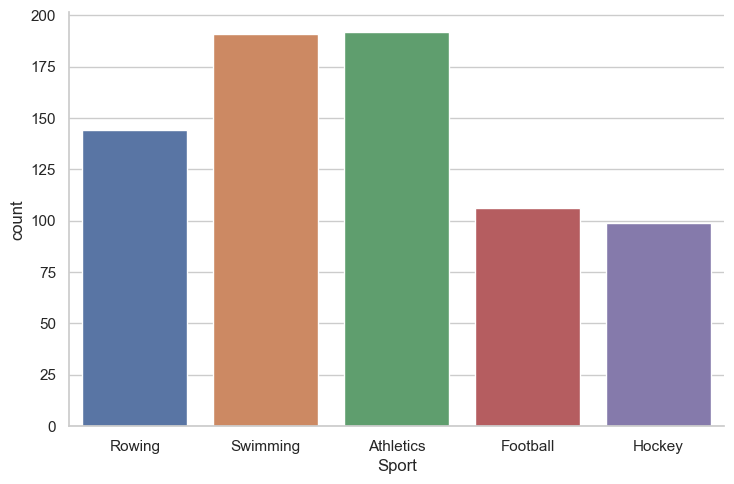

In [76]:
sns.catplot(x='Sport', data=olympics_2016_top_df, aspect=1.5, kind='count')

C:\Users\G517844\pyscripts\vizbook\lib\site-packages\ipykernel_launcher.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  """Entry point for launching an IPython kernel.


<AxesSubplot:xlabel='Age'>

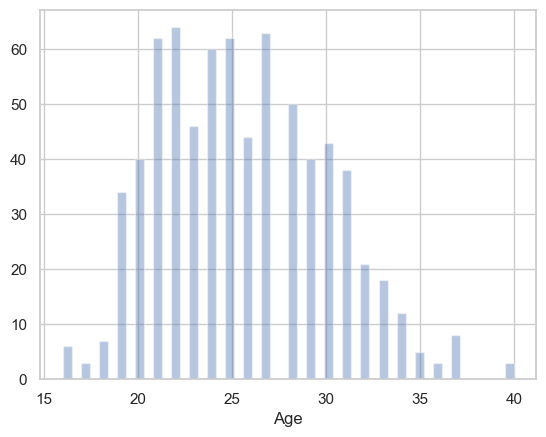

In [79]:
sns.distplot(olympics_2016_top_df.Age, kde=False, bins=50)

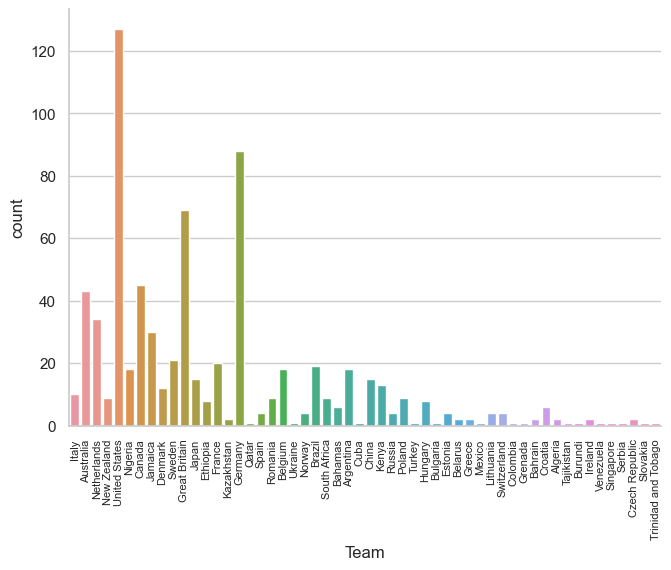

In [83]:
ax = sns.catplot(x='Team', data=olympics_2016_top_df, aspect=1.5, kind='count')
ax.set_xticklabels(fontsize=8, rotation=90)

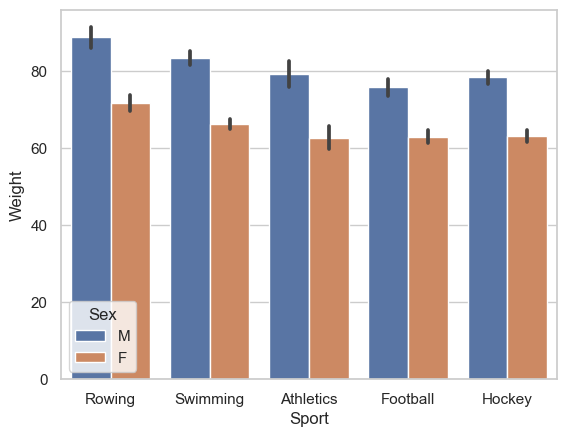

In [84]:
ax = sns.barplot(x='Sport', y='Weight', hue='Sex', data=olympics_2016_top_df)